#### 主成分分析(PCA)

In [1]:
import numpy as np
class PCA:
    def __init__(self,n_components=0.95):
        self.n_components=n_components
        
    def fit_transform(self,X):
        meanVals = np.mean(X, axis=0)
        meanRemoved = X - meanVals     #去除均值
        covMat = np.cov(meanRemoved, rowvar=0)  #计算协方差矩阵
        eigVals,eigVects = np.linalg.eig(np.mat(covMat))  #计算协方差矩阵的特征值和特征向量
        
        self.explained_variance_=eigVals
        self.covariance=covMat
        
        self.explained_variance_ratio_=eigVals/sum(eigVals)
        if 0<self.n_components<1:    #如果为小数，将小数转化为n_components个数
            sum_eigVals=0
            for i,v in enumerate(eigVals):
                sum_eigVals=sum_eigVals+v
                if (sum_eigVals/sum(eigVals))>self.n_components:
                    self.n_components=i+1
                    break
            eigValInd = np.argsort(eigVals)
            eigValInd = eigValInd[:-(self.n_components+1):-1]
            redEigVects=eigVects[:,eigValInd] 
            redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
            lowDDataMat = meanRemoved * redEigVects#transf
        elif self.n_components>1:
            eigValInd = np.argsort(eigVals)
            eigValInd = eigValInd[:-(self.n_components+1):-1]
            redEigVects=eigVects[:,eigValInd] 
            redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
            lowDDataMat = meanRemoved * redEigVects#transf
        else:
            raise ('Illegal parameter')
        return lowDDataMat.A

In [2]:
from sklearn.datasets import load_digits
digits_data = load_digits()
n = len(digits_data.images)
image_data = digits_data.images.reshape((n, -1))

<IPython.core.display.Javascript object>


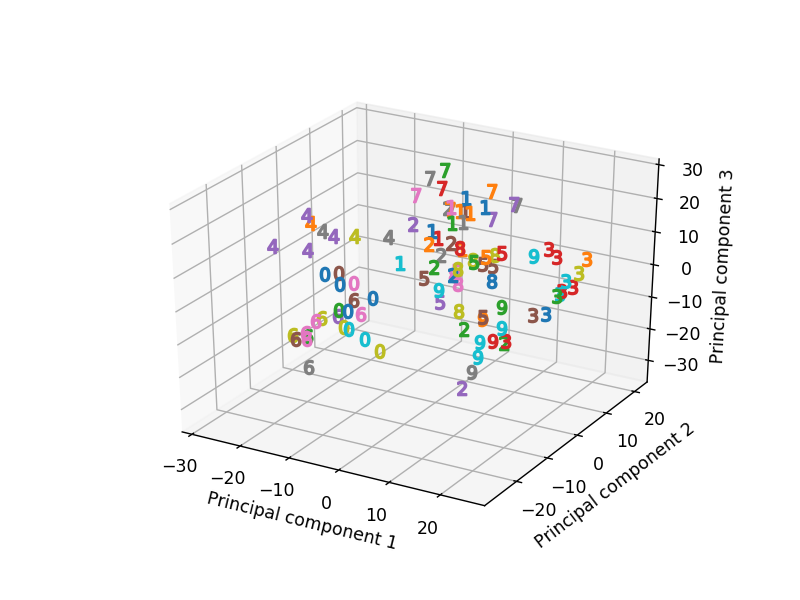

Text(0.5, 0, 'Principal component 3')

In [7]:
pca_transformer = PCA(n_components=3)
pca_images = pca_transformer.fit_transform(image_data)
labels = digits_data.target

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

#### 独立成分分析(ICA)

Wall time: 0 ns


Text(0.5, 0, 'Principal component 3')

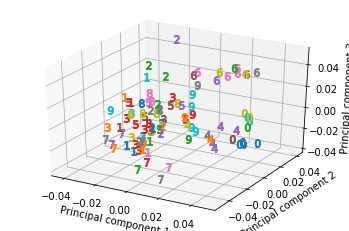

In [4]:
%time
from sklearn.decomposition import FastICA
Fast_transformer = FastICA(n_components=3)
ica_images = Fast_transformer.fit_transform(image_data)
# Groundtruth label of the number appearing in each image
labels = digits_data.target


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(ica_images[i,0], ica_images[i,1], ica_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

#### MDS多维标度算法

Wall time: 0 ns


Text(0.5, 0, 'Principal component 3')

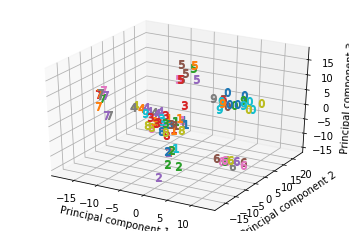

In [5]:
%time
from sklearn.manifold import TSNE
TSN_transformer = TSNE(n_components=3)
mds_images = TSN_transformer.fit_transform(image_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(mds_images[i,0], mds_images[i,1], mds_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')

#### LDA降维

D:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5, 0, 'Principal component 3')

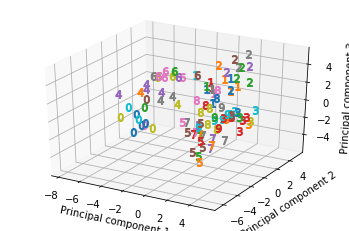

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_images=LinearDiscriminantAnalysis(n_components=3).fit_transform(image_data,labels)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(LDA_images[i,0], LDA_images[i,1], LDA_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')